# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_treatment_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner") 

# Display the data table for preview
display(mouse_treatment_data.head())
display(mouse_treatment_data.info())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


None

In [2]:
# Checking the number of mice.
print(mouse_treatment_data["Mouse ID"].nunique())


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dups = mouse_treatment_data.duplicated(subset=["Mouse ID","Timepoint"])
print(mouse_dups[mouse_dups==True])

# Create a list of row index values for duplicates
list_mouse_dups = list(mouse_dups[mouse_dups==True].index)
print(list_mouse_dups)

# Duplicate Dataframe
mouse_treatment_data_dups = mouse_treatment_data.loc[list_mouse_dups, :]
mouse_treatment_data_dups

909    True
911    True
913    True
915    True
917    True
dtype: bool
[909, 911, 913, 915, 917]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = mouse_treatment_data[mouse_treatment_data["Mouse ID"]=="g989"]
display(dup_mouse)
print(len(dup_mouse))

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


13


In [5]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_treatment_data.drop(list_mouse_dups, axis=0, inplace=True)
# display(mouse_treatment_data.head())

# display(len(mouse_treatment_data)) # 1888, 5 duplicates dropped

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mouse_rows = list(dup_mouse.index)
# display(dup_mouse_rows)
mouse_treatment_data.drop(dup_mouse_rows, axis=0, inplace=True)



[908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920]

1880

In [7]:
# Checking the number of mice in the clean DataFrame.
print(mouse_treatment_data["Mouse ID"].nunique())

248


## Summary Statistics

In [8]:
mouse_treatment_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and calc mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = mouse_treatment_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(by = "Drug Regimen").mean()
median_tumor_vol = mouse_treatment_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(by = "Drug Regimen").median()
var_tumor_vol = mouse_treatment_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(by = "Drug Regimen").var()
std_tumor_vol = mouse_treatment_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(by = "Drug Regimen").std()
sem_tumor_vol = mouse_treatment_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(by = "Drug Regimen").sem()

# Assemble the resulting series into a single summary DataFrame.
stat_list = [mean_tumor_vol, median_tumor_vol, var_tumor_vol, std_tumor_vol, sem_tumor_vol]
stat_summary = pd.DataFrame()

# Loop col by col to build summary table
for stat in stat_list:
    stat_summary = pd.concat([stat_summary, stat], axis = 1)

stat_summary.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", 
                        "Tumor Volume Std. Err."]

display(stat_summary)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
mouse_treatment_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(by = "Drug Regimen").agg(func=["mean", "median", 
                                                                                                     "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [28]:
mouse_treatment_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

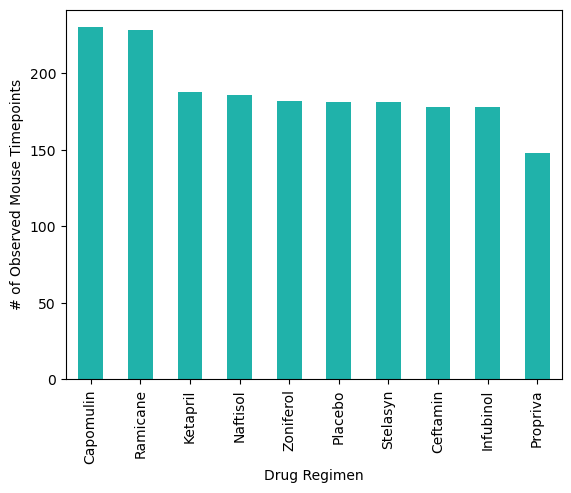

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_by_drug = mouse_treatment_data[["Drug Regimen", "Timepoint"]].groupby(by = "Drug Regimen").count() \
                     .sort_values(by = "Timepoint", ascending=False)

timepoints_by_drug.plot.bar(legend = False, color = "lightseagreen")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

In [64]:
mouse_treatment_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [65]:
mouse_treatment_data.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1188,m550,Ketapril,Male,18,28,20,53.757945,3
1256,o287,Ceftamin,Male,2,28,25,52.068486,3
461,a203,Infubinol,Female,20,23,35,61.931650,2
782,e227,Placebo,Male,1,30,35,66.949121,3
100,u364,Capomulin,Male,18,17,25,35.503616,2


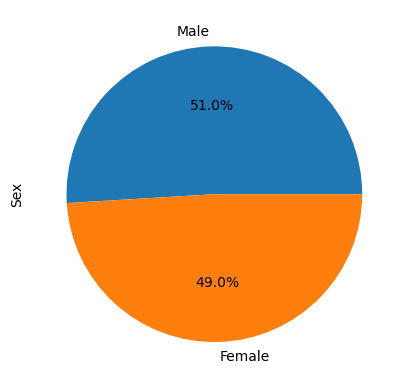

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
males = len(mouse_treatment_data["Sex"][mouse_treatment_data["Sex"] == "Male"])
females = len(mouse_treatment_data["Sex"][mouse_treatment_data["Sex"] == "Female"])

# Create a DataFrame
mouse_sex = pd.DataFrame(data = {"Sex": [males, females]}, index = ["Male", "Female"])

# Plot
mouse_sex.plot.pie(y="Sex", autopct = '%1.1f%%', legend = False )

plt.show()


## Quartiles, Outliers and Boxplots

In [83]:
mouse_treatment_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [89]:
# last_mouse = mouse_treatment_data[mouse_treatment_data["Mouse ID"] == "a203"][-1]
mouse_id = "o287"
mouse = mouse_treatment_data[mouse_treatment_data["Mouse ID"] == mouse_id]

display(mouse.iloc[[-1]])
display(mouse_treatment_data[mouse_treatment_data["Mouse ID"] == mouse_id])
# display(mouse_treatment_data[mouse_treatment_data["Mouse ID"] == "a203"][-1])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1260,o287,Ceftamin,Male,2,28,45,59.741901,4


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1251,o287,Ceftamin,Male,2,28,0,45.000000,0
1252,o287,Ceftamin,Male,2,28,5,45.586804,0
1253,o287,Ceftamin,Male,2,28,10,47.360201,1
1254,o287,Ceftamin,Male,2,28,15,48.679453,1
1255,o287,Ceftamin,Male,2,28,20,50.856141,2
1256,o287,Ceftamin,Male,2,28,25,52.068486,3
1257,o287,Ceftamin,Male,2,28,30,54.503001,3
1258,o287,Ceftamin,Male,2,28,35,55.118290,4
1259,o287,Ceftamin,Male,2,28,40,57.197193,4
1260,o287,Ceftamin,Male,2,28,45,59.741901,4


In [97]:
pd.unique(mouse_treatment_data["Mouse ID"])[0:5]
len(pd.unique(mouse_treatment_data["Mouse ID"]))
list(pd.unique(mouse_treatment_data["Mouse ID"]))

AttributeError: 'list' object has no attribute 'shape'

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mice_list = list(pd.unique(mouse_treatment_data["Mouse ID"]))
final_vol_df = pd.DataFrame()

# Start by getting the last (greatest) timepoint for each mouse
for mouse in mice_list:
    mouse_id_data = mouse_treatment_data[mouse_treatment_data["Mouse ID"] == mouse]
    mouse_final_row = mouse_id_data.iloc[[-1]]
    final_vol_df = pd.concat([final_vol_df, mouse_final_row]) 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


248

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mice_list = list(pd.unique(mouse_treatment_data["Mouse ID"]))
final_timepoint_df = pd.DataFrame()

# Start by getting the last (greatest) timepoint for each mouse
# Create a Dataframe containing the rows with the greatest timepoint for each mouse
for mouse in mice_list:
    mouse_id_data = mouse_treatment_data[mouse_treatment_data["Mouse ID"] == mouse_id]
    mouse_final_row = mouse_id_data.iloc[[-1]]
    final_timepoint_df.append(mouse_final_row)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_plotting_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


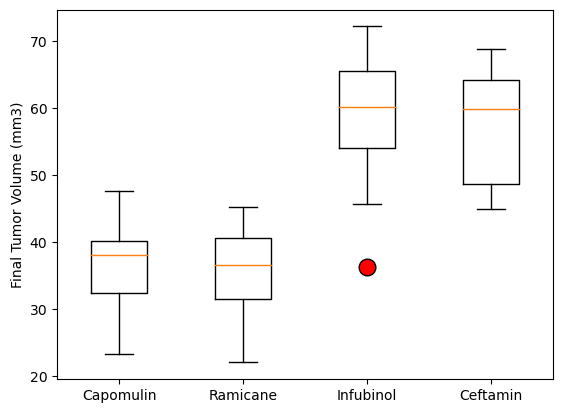

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

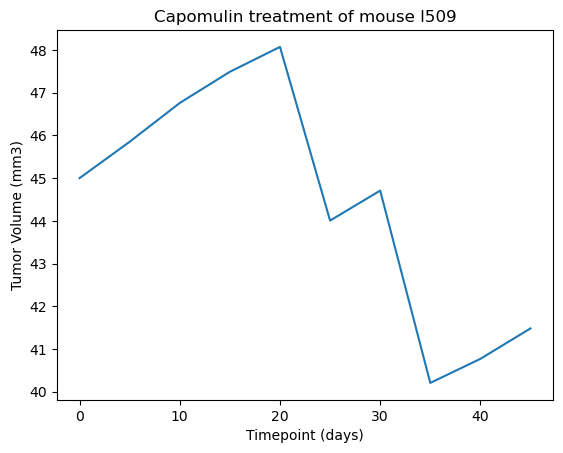

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


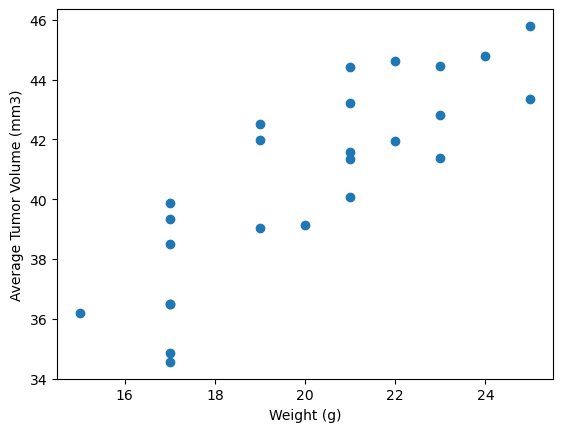

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


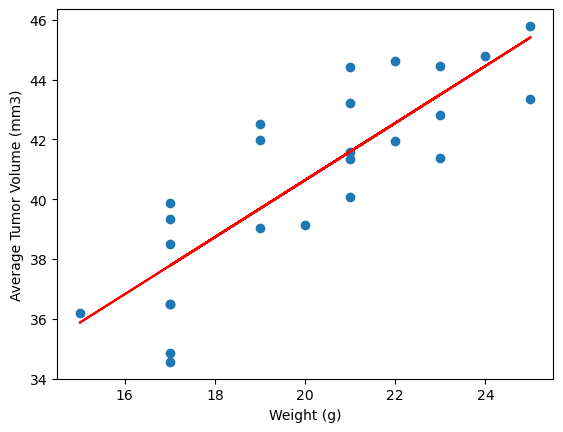

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
